# 🔬 Comparaison des Méthodes de Tokenisation

**Module 2 - Preprocessing et Tokenisation**

## 🎯 Objectifs

Dans ce notebook, nous allons :
- Implémenter et comparer **4 méthodes** de tokenisation
- Tester sur des **textes français complexes**
- Mesurer les **performances** de chaque méthode
- Créer des **visualisations** pour mieux comprendre
- Donner des **recommandations** pratiques

## 📚 Les 4 Méthodes Étudiées

1. **Split simple** : `text.split()`
2. **Expressions régulières** : `re.findall()`
3. **NLTK** : `nltk.word_tokenize()`
4. **spaCy** : `nlp(text)`

## 📦 Installation et Importation

In [14]:
# Installation des dépendances (décommentez si nécessaire)
!pip install nltk spacy matplotlib pandas seaborn
!python -m spacy download fr_core_news_sm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 20.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 632.8/632.8 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 832.7/832.7 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 24.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19/19 [spacy]m18/19 [spacy]ge-data]
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 22.2 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')


In [15]:
import re
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Configuration de l'affichage
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✅ Bibliothèques de base importées")

✅ Bibliothèques de base importées


In [16]:
# Import NLTK
try:
    import nltk
    # Télécharger les ressources nécessaires
    nltk.download('punkt', quiet=True)
    nltk.download('punkt_tab', quiet=True)
    from nltk.tokenize import word_tokenize
    print("✅ NLTK configuré")
    NLTK_AVAILABLE = True
except ImportError:
    print("❌ NLTK non disponible")
    NLTK_AVAILABLE = False

✅ NLTK configuré


In [17]:
# Import spaCy
try:
    import spacy
    # Charger le modèle français
    nlp = spacy.load('fr_core_news_sm')
    print("✅ spaCy configuré avec le modèle français")
    SPACY_AVAILABLE = True
except (ImportError, OSError):
    print("❌ spaCy ou modèle français non disponible")
    print("💡 Installez avec: python -m spacy download fr_core_news_sm")
    SPACY_AVAILABLE = False

✅ spaCy configuré avec le modèle français


## 🔧 Implémentation des 4 Méthodes

In [18]:
class TokenisationComparator:
    """Classe pour comparer différentes méthodes de tokenisation"""
    
    def __init__(self):
        self.methods = {
            'Split Simple': self._tokenize_split,
            'Regex': self._tokenize_regex,
            'NLTK': self._tokenize_nltk if NLTK_AVAILABLE else None,
            'spaCy': self._tokenize_spacy if SPACY_AVAILABLE else None
        }
        # Supprimer les méthodes non disponibles
        self.methods = {k: v for k, v in self.methods.items() if v is not None}
    
    def _tokenize_split(self, text):
        """Méthode 1: Split simple par espaces"""
        return text.split()
    
    def _tokenize_regex(self, text):
        """Méthode 2: Expressions régulières"""
        # Garde les mots (lettres + chiffres + apostrophes + tirets)
        return re.findall(r"\b[\w'-]+\b", text)
    
    def _tokenize_nltk(self, text):
        """Méthode 3: NLTK word_tokenize"""
        if not NLTK_AVAILABLE:
            return []
        return word_tokenize(text, language='french')
    
    def _tokenize_spacy(self, text):
        """Méthode 4: spaCy tokenizer"""
        if not SPACY_AVAILABLE:
            return []
        doc = nlp(text)
        return [token.text for token in doc]
    
    def compare_all(self, text):
        """Compare toutes les méthodes sur un texte donné"""
        results = {}
        
        print(f"📝 **Texte à analyser :**")
        print(f'"{text}"\n')
        
        for method_name, method_func in self.methods.items():
            tokens = method_func(text)
            results[method_name] = tokens
            
            print(f"**{method_name}** ({len(tokens)} tokens):")
            print(f"[{', '.join(repr(t) for t in tokens)}]\n")
        
        return results
    
    def benchmark_speed(self, texts, iterations=100):
        """Benchmark de vitesse sur une liste de textes"""
        results = {}
        
        for method_name, method_func in self.methods.items():
            start_time = time.time()
            
            for _ in range(iterations):
                for text in texts:
                    method_func(text)
            
            total_time = time.time() - start_time
            results[method_name] = total_time
        
        return results

# Créer notre comparateur
comparator = TokenisationComparator()
print(f"🔧 Comparateur initialisé avec {len(comparator.methods)} méthodes:")
print(f"   {list(comparator.methods.keys())}")

🔧 Comparateur initialisé avec 4 méthodes:
   ['Split Simple', 'Regex', 'NLTK', 'spaCy']


## 🧪 Tests sur des Exemples Français Complexes

Testons nos méthodes sur différents types de textes français avec leurs spécificités.

In [19]:
# Exemples de textes français avec différentes difficultés
exemples_francais = {
    "Contractions simples": "J'adore ce livre, n'est-ce pas ?",
    "Mots composés": "Le self-service anti-âge coûte vingt-trois euros.",
    "Accents et ponctuation": "Café, thé, château... Qu'est-ce que vous préférez ?",
    "Phrases complexes": "Marie-Claire habite à Saint-Étienne depuis l'année dernière.",
    "Texte informel": "Salut ! Comment ça va ??? J'espère que tout va BIEN 🙂",
    "Négations": "Il n'y a pas d'aujourd'hui sans hier, n'est-ce pas ?"
}

print("🧪 **TESTS SUR DES EXEMPLES FRANÇAIS COMPLEXES**\n")
print("="*60)

# Tester chaque exemple
for titre, texte in exemples_francais.items():
    print(f"\n🔍 **{titre.upper()}**")
    print("-" * 40)
    results = comparator.compare_all(texte)
    print("\n" + "="*60)

🧪 **TESTS SUR DES EXEMPLES FRANÇAIS COMPLEXES**


🔍 **CONTRACTIONS SIMPLES**
----------------------------------------
📝 **Texte à analyser :**
"J'adore ce livre, n'est-ce pas ?"

**Split Simple** (6 tokens):
["J'adore", 'ce', 'livre,', "n'est-ce", 'pas', '?']

**Regex** (5 tokens):
["J'adore", 'ce', 'livre', "n'est-ce", 'pas']

**NLTK** (7 tokens):
["J'adore", 'ce', 'livre', ',', "n'est-ce", 'pas', '?']

**spaCy** (10 tokens):
["J'", 'adore', 'ce', 'livre', ',', "n'", 'est', '-ce', 'pas', '?']



🔍 **MOTS COMPOSÉS**
----------------------------------------
📝 **Texte à analyser :**
"Le self-service anti-âge coûte vingt-trois euros."

**Split Simple** (6 tokens):
['Le', 'self-service', 'anti-âge', 'coûte', 'vingt-trois', 'euros.']

**Regex** (6 tokens):
['Le', 'self-service', 'anti-âge', 'coûte', 'vingt-trois', 'euros']

**NLTK** (7 tokens):
['Le', 'self-service', 'anti-âge', 'coûte', 'vingt-trois', 'euros', '.']

**spaCy** (9 tokens):
['Le', 'self', '-', 'service', 'anti-âge', 'coûte', 

## 📊 Analyse Comparative Détaillée

In [20]:
# Analyser les différences pour chaque exemple
def analyze_differences(results_dict):
    """Analyse les différences entre les méthodes"""
    analysis = {}
    
    for titre, texte in exemples_francais.items():
        print(f"\n📈 **ANALYSE: {titre}**")
        print(f"Texte: \"{texte}\"")
        
        # Tokeniser avec chaque méthode
        method_results = {}
        for method_name, method_func in comparator.methods.items():
            tokens = method_func(texte)
            method_results[method_name] = tokens
        
        # Comparer les résultats
        token_counts = {name: len(tokens) for name, tokens in method_results.items()}
        
        print(f"\n📊 Nombre de tokens:")
        for method, count in token_counts.items():
            print(f"   {method}: {count} tokens")
        
        # Identifier les tokens uniques à chaque méthode
        all_tokens = set()
        for tokens in method_results.values():
            all_tokens.update(tokens)
        
        print(f"\n🔍 Différences notables:")
        
        # Contractions
        if "'" in texte:
            print(f"   • Gestion des contractions ('j', 'n', etc.)")
            for method, tokens in method_results.items():
                contractions = [t for t in tokens if "'" in t and len(t) <= 3]
                if contractions:
                    print(f"     {method}: {contractions}")
        
        # Ponctuation
        punct_chars = set(['.', ',', '!', '?', ';', ':'])
        if any(p in texte for p in punct_chars):
            print(f"   • Gestion de la ponctuation:")
            for method, tokens in method_results.items():
                punct_tokens = [t for t in tokens if t in punct_chars]
                if punct_tokens:
                    print(f"     {method}: {punct_tokens}")
                else:
                    print(f"     {method}: [ponctuation supprimée]")
        
        # Mots composés
        if "-" in texte:
            print(f"   • Gestion des traits d'union:")
            for method, tokens in method_results.items():
                hyphenated = [t for t in tokens if "-" in t and len(t) > 1]
                if hyphenated:
                    print(f"     {method}: {hyphenated}")
        
        analysis[titre] = {
            'texte': texte,
            'results': method_results,
            'counts': token_counts
        }
    
    return analysis

# Lancer l'analyse
analysis_results = analyze_differences(exemples_francais)


📈 **ANALYSE: Contractions simples**
Texte: "J'adore ce livre, n'est-ce pas ?"

📊 Nombre de tokens:
   Split Simple: 6 tokens
   Regex: 5 tokens
   NLTK: 7 tokens
   spaCy: 10 tokens

🔍 Différences notables:
   • Gestion des contractions ('j', 'n', etc.)
     spaCy: ["J'", "n'"]
   • Gestion de la ponctuation:
     Split Simple: ['?']
     Regex: [ponctuation supprimée]
     NLTK: [',', '?']
     spaCy: [',', '?']
   • Gestion des traits d'union:
     Split Simple: ["n'est-ce"]
     Regex: ["n'est-ce"]
     NLTK: ["n'est-ce"]
     spaCy: ['-ce']

📈 **ANALYSE: Mots composés**
Texte: "Le self-service anti-âge coûte vingt-trois euros."

📊 Nombre de tokens:
   Split Simple: 6 tokens
   Regex: 6 tokens
   NLTK: 7 tokens
   spaCy: 9 tokens

🔍 Différences notables:
   • Gestion de la ponctuation:
     Split Simple: [ponctuation supprimée]
     Regex: [ponctuation supprimée]
     NLTK: ['.']
     spaCy: ['.']
   • Gestion des traits d'union:
     Split Simple: ['self-service', 'anti-âge', 'vin

## ⚡ Benchmark de Performance

In [21]:
# Créer un dataset plus large pour le benchmark
textes_benchmark = [
    "Bonjour, comment allez-vous aujourd'hui ?",
    "J'adore les croissants du matin avec mon café.",
    "Le e-commerce français représente 20% du marché européen.",
    "Marie-Antoinette habitait à Versailles au XVIIIe siècle.",
    "N'hésitez pas à nous contacter pour plus d'informations.",
    "C'est un anti-inflammatoire très efficace, n'est-ce pas ?",
    "Rendez-vous à 14h30 pour discuter du projet.",
    "Qu'est-ce que vous pensez de cette nouvelle technologie ?",
    "L'intelligence artificielle transforme notre société.",
    "Saint-Germain-des-Prés est un quartier très animé."
] * 10  # Répéter pour avoir plus de données

print(f"⚡ **BENCHMARK DE PERFORMANCE**")
print(f"Dataset: {len(textes_benchmark)} textes")
print(f"Iterations: 50 par méthode\n")

# Lancer le benchmark
benchmark_results = comparator.benchmark_speed(textes_benchmark, iterations=50)

# Afficher les résultats
print("📊 **RÉSULTATS (temps en secondes):**")
sorted_results = sorted(benchmark_results.items(), key=lambda x: x[1])

for i, (method, time_taken) in enumerate(sorted_results, 1):
    print(f"{i}. {method}: {time_taken:.4f}s")

# Calculer les ratios
fastest_time = min(benchmark_results.values())
print(f"\n📈 **RATIOS (par rapport au plus rapide):**")
for method, time_taken in sorted_results:
    ratio = time_taken / fastest_time
    print(f"{method}: {ratio:.1f}x")

⚡ **BENCHMARK DE PERFORMANCE**
Dataset: 100 textes
Iterations: 50 par méthode

📊 **RÉSULTATS (temps en secondes):**
1. Split Simple: 0.0010s
2. Regex: 0.0174s
3. NLTK: 0.1148s
4. spaCy: 12.2221s

📈 **RATIOS (par rapport au plus rapide):**
Split Simple: 1.0x
Regex: 17.1x
NLTK: 112.5x
spaCy: 11983.0x


## 📈 Visualisations Comparatives

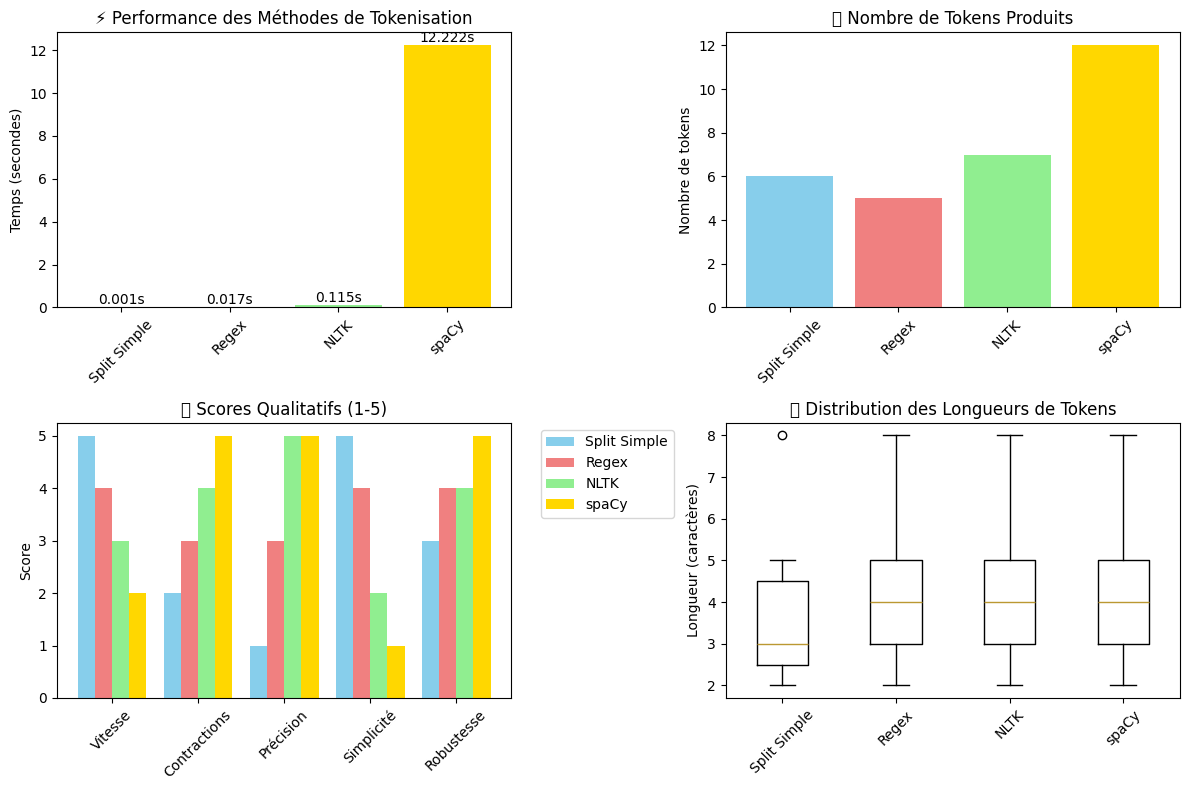

In [22]:
# Graphique des performances
plt.figure(figsize=(12, 8))

# Subplot 1: Temps d'exécution
plt.subplot(2, 2, 1)
methods = list(benchmark_results.keys())
times = list(benchmark_results.values())
bars = plt.bar(methods, times, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'][:len(methods)])
plt.title('⚡ Performance des Méthodes de Tokenisation')
plt.ylabel('Temps (secondes)')
plt.xticks(rotation=45)

# Ajouter les valeurs sur les barres
for bar, time_val in zip(bars, times):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001, 
             f'{time_val:.3f}s', ha='center', va='bottom')

# Subplot 2: Nombre de tokens par exemple
plt.subplot(2, 2, 2)
exemple_simple = "J'adore les self-services, n'est-ce pas ?"
token_counts = {}
for method_name, method_func in comparator.methods.items():
    tokens = method_func(exemple_simple)
    token_counts[method_name] = len(tokens)

plt.bar(token_counts.keys(), token_counts.values(), 
        color=['skyblue', 'lightcoral', 'lightgreen', 'gold'][:len(token_counts)])
plt.title('📊 Nombre de Tokens Produits')
plt.ylabel('Nombre de tokens')
plt.xticks(rotation=45)

# Subplot 3: Radar chart des caractéristiques
plt.subplot(2, 2, 3)
# Créer des scores qualitatifs (subjectifs mais éducatifs)
characteristics = {
    'Split Simple': [5, 2, 1, 5, 3],
    'Regex': [4, 3, 3, 4, 4],
    'NLTK': [3, 4, 5, 2, 4],
    'spaCy': [2, 5, 5, 1, 5]
}
criteria = ['Vitesse', 'Contractions', 'Précision', 'Simplicité', 'Robustesse']

x = range(len(criteria))
width = 0.2
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold']

for i, (method, scores) in enumerate(characteristics.items()):
    if method in comparator.methods:  # Seulement si la méthode est disponible
        plt.bar([xi + i*width for xi in x], scores, width, 
                label=method, color=colors[i % len(colors)])

plt.title('🎯 Scores Qualitatifs (1-5)')
plt.xticks([xi + width*1.5 for xi in x], criteria, rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Score')

# Subplot 4: Distribution des longueurs de tokens
plt.subplot(2, 2, 4)
all_tokens_by_method = {}
for method_name, method_func in comparator.methods.items():
    all_tokens = []
    for texte in list(exemples_francais.values())[:3]:  # Prendre 3 exemples
        tokens = method_func(texte)
        all_tokens.extend([len(t) for t in tokens if t.isalpha()])  # Longueur des mots
    all_tokens_by_method[method_name] = all_tokens

# Boxplot des longueurs
data_for_box = [tokens for tokens in all_tokens_by_method.values()]
labels_for_box = list(all_tokens_by_method.keys())
plt.boxplot(data_for_box, labels=labels_for_box)
plt.title('📏 Distribution des Longueurs de Tokens')
plt.ylabel('Longueur (caractères)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 🎯 Recommandations Pratiques

Voici nos recommandations basées sur l'analyse :

In [23]:
def generate_recommendations():
    """Génère des recommandations basées sur les tests"""
    
    recommendations = {
        "🚀 Prototypage Rapide": {
            "méthode": "Split Simple",
            "cas": "Tests rapides, POCs, données propres",
            "avantages": ["Aucune dépendance", "Très rapide", "Code minimal"],
            "inconvénients": ["Garde la ponctuation", "Ignore les contractions"]
        },
        
        "🔧 Contrôle Personnalisé": {
            "méthode": "Expressions Régulières",
            "cas": "Besoins spécifiques, domaines particuliers",
            "avantages": ["Très flexible", "Contrôle total", "Performance prévisible"],
            "inconvénients": ["Complexité des regex", "Maintenance difficile"]
        },
        
        "🎓 Recherche et Éducation": {
            "méthode": "NLTK",
            "cas": "Projets académiques, recherche, apprentissage",
            "avantages": ["Bien documenté", "Communauté active", "Fonctions riches"],
            "inconvénients": ["Plus lent", "Optimisé pour l'anglais"]
        },
        
        "🏭 Production": {
            "méthode": "spaCy",
            "cas": "Applications en production, gros volumes",
            "avantages": ["Très performant", "Modèles spécialisés", "Pipeline complet"],
            "inconvénients": ["Installation complexe", "Taille des modèles"]
        }
    }
    
    print("🎯 **RECOMMANDATIONS PAR CAS D'USAGE**\n")
    print("="*60)
    
    for use_case, info in recommendations.items():
        print(f"\n{use_case}")
        print(f"**Méthode recommandée:** {info['méthode']}")
        print(f"**Cas d'usage:** {info['cas']}")
        
        print(f"\n✅ **Avantages:**")
        for avantage in info['avantages']:
            print(f"   • {avantage}")
        
        print(f"\n❌ **Inconvénients:**")
        for inconvenient in info['inconvénients']:
            print(f"   • {inconvenient}")
        
        print("-" * 50)

generate_recommendations()

🎯 **RECOMMANDATIONS PAR CAS D'USAGE**


🚀 Prototypage Rapide
**Méthode recommandée:** Split Simple
**Cas d'usage:** Tests rapides, POCs, données propres

✅ **Avantages:**
   • Aucune dépendance
   • Très rapide
   • Code minimal

❌ **Inconvénients:**
   • Garde la ponctuation
   • Ignore les contractions
--------------------------------------------------

🔧 Contrôle Personnalisé
**Méthode recommandée:** Expressions Régulières
**Cas d'usage:** Besoins spécifiques, domaines particuliers

✅ **Avantages:**
   • Très flexible
   • Contrôle total
   • Performance prévisible

❌ **Inconvénients:**
   • Complexité des regex
   • Maintenance difficile
--------------------------------------------------

🎓 Recherche et Éducation
**Méthode recommandée:** NLTK
**Cas d'usage:** Projets académiques, recherche, apprentissage

✅ **Avantages:**
   • Bien documenté
   • Communauté active
   • Fonctions riches

❌ **Inconvénients:**
   • Plus lent
   • Optimisé pour l'anglais
-------------------------------

## 🧪 Zone d'Expérimentation

Testez vos propres textes !

In [24]:
# Zone libre pour tester vos propres textes
def test_custom_text(texte):
    """Fonction pour tester un texte personnalisé"""
    print(f"🧪 **TEST PERSONNALISÉ**\n")
    results = comparator.compare_all(texte)
    
    # Analyse rapide
    print("\n🔍 **ANALYSE RAPIDE:**")
    
    # Compter les différences
    token_counts = {name: len(tokens) for name, tokens in results.items()}
    min_tokens = min(token_counts.values())
    max_tokens = max(token_counts.values())
    
    print(f"• Variation du nombre de tokens: {min_tokens} à {max_tokens}")
    
    if "'" in texte:
        print("• ⚠️  Contractions détectées - NLTK/spaCy recommandés")
    
    if "-" in texte:
        print("• ⚠️  Mots composés détectés - Attention à la segmentation")
    
    return results

# Exemples à tester (modifiez à votre guise)
mon_texte = "C'est vraiment super, n'est-ce pas ? J'adore le machine-learning !"

# Décommentez pour tester
# test_custom_text(mon_texte)

## 📝 Exercices Pratiques

**Exercice 1:** Testez ces phrases et observez les différences :
- `"L'anti-âge coûte vingt-trois euros, n'est-ce pas ?"`
- `"Qu'est-ce que c'est que ça ?"`
- `"Jean-Claude habite à Bourg-en-Bresse."`

**Exercice 2:** Créez une expression régulière qui :
- Garde les mots avec apostrophes (`j'ai`, `aujourd'hui`)
- Sépare la ponctuation
- Préserve les mots composés avec tirets

**Exercice 3:** Comparez les performances sur un texte de 1000 mots.

In [25]:
# Zone pour les exercices
exercice_phrases = [
    "L'anti-âge coûte vingt-trois euros, n'est-ce pas ?",
    "Qu'est-ce que c'est que ça ?",
    "Jean-Claude habite à Bourg-en-Bresse."
]

print("📝 **EXERCICE 1: PHRASES COMPLEXES**\n")

for i, phrase in enumerate(exercice_phrases, 1):
    print(f"**Phrase {i}:**")
    test_custom_text(phrase)
    print("\n" + "="*50 + "\n")

📝 **EXERCICE 1: PHRASES COMPLEXES**

**Phrase 1:**
🧪 **TEST PERSONNALISÉ**

📝 **Texte à analyser :**
"L'anti-âge coûte vingt-trois euros, n'est-ce pas ?"

**Split Simple** (7 tokens):
["L'anti-âge", 'coûte', 'vingt-trois', 'euros,', "n'est-ce", 'pas', '?']

**Regex** (6 tokens):
["L'anti-âge", 'coûte', 'vingt-trois', 'euros', "n'est-ce", 'pas']

**NLTK** (8 tokens):
["L'anti-âge", 'coûte', 'vingt-trois', 'euros', ',', "n'est-ce", 'pas', '?']

**spaCy** (11 tokens):
["L'", 'anti-âge', 'coûte', 'vingt-trois', 'euros', ',', "n'", 'est', '-ce', 'pas', '?']


🔍 **ANALYSE RAPIDE:**
• Variation du nombre de tokens: 6 à 11
• ⚠️  Contractions détectées - NLTK/spaCy recommandés
• ⚠️  Mots composés détectés - Attention à la segmentation


**Phrase 2:**
🧪 **TEST PERSONNALISÉ**

📝 **Texte à analyser :**
"Qu'est-ce que c'est que ça ?"

**Split Simple** (6 tokens):
["Qu'est-ce", 'que', "c'est", 'que', 'ça', '?']

**Regex** (5 tokens):
["Qu'est-ce", 'que', "c'est", 'que', 'ça']

**NLTK** (6 tokens):
[

In [26]:
# Exercice 2: Regex personnalisée
def tokenize_regex_custom(text):
    """Tokeniseur regex personnalisé pour le français"""
    # TODO: Créez votre regex ici
    # Indices:
    # - \w+ pour les mots
    # - \w+'\w+ pour les contractions
    # - \w+-\w+ pour les mots composés
    # - [.!?] pour la ponctuation
    
    pattern = r"\b\w+(?:'\w+)?(?:-\w+)*\b|[.!?,:;]"
    return re.findall(pattern, text)

# Test de la regex personnalisée
test_text = "J'ai rendez-vous avec Marie-Claire, n'est-ce pas ?"
print("🔧 **EXERCICE 2: REGEX PERSONNALISÉE**\n")
print(f"Texte: {test_text}")
print(f"Résultat: {tokenize_regex_custom(test_text)}")

🔧 **EXERCICE 2: REGEX PERSONNALISÉE**

Texte: J'ai rendez-vous avec Marie-Claire, n'est-ce pas ?
Résultat: ["J'ai", 'rendez-vous', 'avec', 'Marie-Claire', ',', "n'est-ce", 'pas', '?']


## 📚 Résumé et Points Clés

### 🎯 Ce que vous avez appris :

1. **4 méthodes de tokenisation** avec leurs avantages/inconvénients
2. **Spécificités du français** : contractions, mots composés, accents
3. **Métriques de performance** : vitesse, précision, robustesse
4. **Choix selon le contexte** : prototypage vs production

### 💡 Points clés à retenir :

- **Pas de solution universelle** - le choix dépend du contexte
- **Français ≠ Anglais** - les contractions sont cruciales
- **Performance vs Précision** - toujours un compromis
- **Testez sur vos données** - ce qui marche pour nous peut ne pas marcher pour vous

### 🚀 Prochaines étapes :

1. **Nettoyage avancé** : stopwords, lemmatisation
2. **Pipeline complet** : intégrer toutes les étapes
3. **Évaluation qualité** : métriques de validation
4. **Optimisation** : adaptation à votre domaine

---

**🎉 Félicitations !** Vous maîtrisez maintenant les bases de la tokenisation en français. 

**➡️ Suite du cours :** [Module 2.4 - Techniques Avancées](../module2_avance.html)